In [ ]:
"""HERE I WILL PUBLISH IDEAS"""
#1 I would like to predict the future sales data.
#2 I would like to connect the australian and new zealand database
#...for both the cutomer and the product
# I can use all databases as features to predict the future sales.
# There is some beautifull charts I can create with NZ and Aus analysis. 
# You can also get the first two letter codes and find out how much.
# Get more data to see if you can predict sales.
# I can look at the change of prices over time.
# It would actually be interesting to look at rossman store data.
# Yea, Rossman is awesome, there is multiple queues to go on



In [2]:
import pandas as pd
import datetime
import numpy as np
from time import strptime

# Setting Maximum Display Settings. 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.nan)

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline


In [3]:
# What you can do is delete if duplicate column (to remove credit)
# Then do the split extract after import and rename
# Then rename if equal to list of dictionary values
# See file 14, this is the fact of the matter, I have file 14 with 3 columns, each named credit.
# I need to specifically know what to extract from the information to do anything meaningful.
# Thus all I need is -> WHAT COLUMNS ARE REQUIRED - I can do the rest from there.

# What I also can do is input all three credits even if it is with zeros. 
# However, this would still be easier manually


# Out of loop test:
# I am just going to have to step through each step. 
bigdata = pd.DataFrame()
tot = pd.DataFrame()
new = pd.DataFrame()
for r in range(1,35):
    #i = 2
    df = pd.read_excel("sales (%d).XLS" % r)
    #if len(df.columns) >14:
    df = df.dropna(how="all")
    df.reset_index(drop="True", inplace=True)
    col = df.columns
    date = col[0]
    date_month=date[date.find("-")+1:].split()[0]
    date_year=date[date.find("-")+1:].split()[1]
    if len(date_year) < 3:
        date_year = "20"+ date_year
    date_month = strptime(date_month[:3], '%b').tm_mon
    full_date =  date_year + "-" + str(date_month) 
    new_date = datetime.datetime.strptime(full_date, "%Y-%m")
    new_header = df.iloc[0] #grab the first row for the header

    df_new = df[1:] #take the data less the header row
    df_new = df_new.rename(columns = new_header) #set the header row as the df header
    new_frame = df_new.dropna(how="all", axis=1)
    #new_frame = df_new
    new_frame["Date"] = new_date
    totals = {}
    totals["totals"] = new_frame.iloc[0]
    totals["totals"] = totals["totals"].rename(full_date).to_frame()
    totals["totals"] = totals["totals"].rename(columns={'1': full_date})
    new_tot = totals["totals"]
    tot = tot.append(new_tot, ignore_index=True)

    new_frame = new_frame[new_frame.Material != "Total"]

    new_frame.reset_index(inplace=True, drop=True)

    #busted = new_frame.ix[new_frame.index< (len(new_frame.index)-2)]

    busted = new_frame.drop(new_frame.index[len(new_frame)-2])

    Code = list()
    Name = list()

    for i in range(len(busted.Material)):
        if busted.Material.iloc[i] != 0 and new_frame.Material.iloc[i] != "":
            full = new_frame.Material.iloc[i]
            name = full[full.find("             "):].split()
            code = full[:full.find("             ")].split()
            Code.append(code)
            Name.append(name)

    busted["Code"] = Code
    busted["Name"] = Name

    busted["Code"] = busted["Code"].str[0]
    busted["Name"] = busted["Name"].str[0]
    busted = busted.drop("Material", axis=1)
    #busted = busted.drop("Code", axis=1)
    #print(busted.dtypes)
    busted.rename(columns=lambda x: x.strip(), inplace=True)
    
    s = set(busted.columns)
    # , 'CredMemos: cost'
    print(r)
    #print(s)
    if 'Net cost' in s:
        busted =busted.rename(columns = {"Net cost":"Net Cost"})
    if 'Inv.sales: cost' in s:
        busted = busted[['Date', 'Name', "Code", "Sales", "Net Sales", "Billing qty", "Qty", 'Inv.sales: cost', "Net Cost"]]
        #print(busted.columns)
        busted.columns = ['Date', 'Name', "Code", 'Sales', 'Net Sales', 'Billing qty','Qty','Cost', 'Net cost']
    else:
        busted = busted[['Date', 'Name', "Code",'Sales', 'Net Sales','Billing qty', 'Qty', 'Cost', 'Net Cost']]
        #print(busted.columns)
        busted.columns = ['Date', 'Name', "Code", 'Sales', 'Net Sales', 'Billing qty','Qty','Cost', 'Net cost']
    busted.reset_index(drop=True, inplace=True)
    #print(busted.shape)
    new = new.append(busted, ignore_index=True)
else:
    print(i)



C:\Users\dsnow\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
98


In [4]:

#bigdata = pd.concat(busted, axis=1)
bigdata = new
bigdata.to_csv("sales_by_product.csv")
tot.to_csv("sales_by_product_totals.csv")

poped_name = bigdata.pop("Name")
poped_date = bigdata.pop("Date")
poped_code = bigdata.pop("Code")
bigdata = bigdata.apply(pd.to_numeric)
bigdata["Name"] = poped_name
bigdata["Date"] = poped_date
bigdata["Code"] = poped_code

bigdata = bigdata.dropna(how="all", axis=1)

bigdata = bigdata.reset_index(drop=True)


date =  bigdata.pop("Date")
big_mean_name = bigdata.groupby("Name").agg([np.mean,np.sum,len]).reset_index()
big_mean_name

big_mean_name.to_csv("sales_product_name_aggregate.csv")

bigdata = bigdata.reset_index(drop=True)
bigdata["Date"] = date.astype(str)
name =  bigdata.pop("Name")
big_mean_date = bigdata.groupby("Date").agg([np.mean,np.sum,len]).reset_index()
# [["Date", "Sales", "Billing qty"]]
big_mean_date

big_mean_date.to_csv("sales_product_date_aggregate.csv")
    


In [5]:
big_mean_date.head()

Date         Sales                        Net Sales              \
                       mean         sum    len          mean         sum   
0  2014-04-01  50152.364597  6218893.21  125.0  54347.208240  6793401.03   
1  2014-05-01  56757.698562  8286623.99  146.0  56713.617877  8280188.21   
2  2014-06-01  40957.909000  4914949.08  121.0  42070.620413  5090545.07   
3  2014-07-01  48570.627969  6217040.38  129.0  52241.065969  6739097.51   
4  2014-08-01  51565.898814  6084776.06  119.0  73534.582017  8750615.26   

           Billing qty                               Qty                      \
     len          mean          sum    len          mean          sum    len   
0  125.0  1.180222e+06  141626605.5  125.0  1.430776e+06  168831570.0  125.0   
1  146.0  1.489342e+06  215954577.0  146.0  1.739485e+06  234830424.0  146.0   
2  121.0  1.272440e+06  152692800.0  121.0  1.466750e+06  165742776.0  121.0   
3  129.0  1.546230e+06  197917489.0  129.0  1.715532e+06  214441485.0  129.0   
4  119.0  1.751238e+06  206646101.0  119.0  3.218617e+06  360485148.0  119.0   

           Cost                         Net cost                     
           mean         sum    len          mean         sum    len  
0  38551.015565  4780325.93  125.0  38544.830081  4779558.93  125.0  
1  42924.697862  6224081.19  146.0  42887.051655  6218622.49  146.0  
2  36005.688250  4320682.59  121.0  35693.004917  4283160.59  121.0  
3  45455.939297  5818360.23  129.0  47626.570853  6143827.64  129.0  
4  47502.493898  5605294.28  119.0  47804.974746  5640987.02  119.0

In [42]:
bigdata["Name"] = name

big_mean_date.sort(columns="Date",  ascending=True, inplace=True)

bigdata.describe()


C:\Users\dsnow\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


Sales     Net Sales   Billing qty           Qty          Cost  \
count  4.007000e+03  4.041000e+03  3.952000e+03  3.842000e+03  4.009000e+03   
mean   6.919486e+04  8.579847e+04  1.826970e+06  2.911393e+06  6.002438e+04   
std    2.203426e+05  3.359702e+05  8.717376e+06  1.584124e+07  2.512251e+05   
min   -3.000000e+01 -3.051388e+05 -1.200000e+01 -5.637880e+06 -3.184343e+04   
25%    1.122252e+04  1.122000e+04  3.157750e+03  2.657075e+05  6.332980e+03   
50%    2.558400e+04  2.580500e+04  3.090100e+05  4.531710e+05  1.721409e+04   
75%    5.306560e+04  5.404968e+04  9.419775e+05  1.108115e+06  3.992925e+04   
max    4.739774e+06  5.900139e+06  1.801246e+08  2.987830e+08  8.258787e+06   

           Net cost  
count  4.024000e+03  
mean   7.294875e+04  
std    3.450548e+05  
min   -1.147309e+05  
25%    6.364512e+03  
50%    1.728532e+04  
75%    4.039382e+04  
max    8.258787e+06

In [48]:
sales = bigdata[["Sales", "Name","Date"]]
sales = sales.sort(columns="Sales")
sales
# Based on this graph, there is a lot of things that I would like to flag. 


C:\Users\dsnow\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


Sales                                Name        Date
4         -30.00     NZQ-GF-PMInfFormula3+DAN-P900-C  2014-04-01
2309      -26.04       NZQ-GOF-FortifiedWMP-P800-Can  2014-11-01
2862        0.00              Rehmannia320+6HFC-TV10  2015-10-01
1640        0.00     RH-ZV-SheepPlacenta15000-SG10-B  2015-06-01
1641        0.00     NDP-NUZ-PMInfFormula1+DAN-P900-  2015-06-01
1369        0.00        TN-SuperBioflavonoidsFC-TV10  2014-07-01
1647        0.00                  TN-Elderberry-HG24  2015-06-01
1654        0.00       TN-OdourlessFishOil1500-SG200  2015-06-01
1661        0.00                  GH-Omega1000-SG400  2015-06-01
1667        0.00          TN-Spirulina1000(NZ)-TB300  2015-06-01
1347        0.00        CodLiverOil+AlgaeDHA-SF16-E0  2014-07-01
1753        0.00               TN-Spirulina1000-TV10  2015-06-01
373         0.00                         Certificate  2015-08-01
2884        0.00             SWV-UBHairSkinNail-L500  2014-09-01
3440        0.00                                   B  2017-01-01
1762        0.00                   BM-LypsineFC-TV09  2015-06-01
414         0.00                                   e  2015-08-01
2784        0.00     BM-Pregnancy&BreastFeeding-SB15  2015-10-01
1791        0.00     GZ11-KangarooEss-SG60-GZ11Bottl  2015-03-01
2711        0.00        ConcentratedFO1500V-SB24E-E0  2014-10-01
1803        0.00     GZ11-St.JohnWort-SG60-GZ11Bottl  2015-03-01
1878        0.00       HalalChewFO+Colostrum-SF16-E4  2015-03-01
1902        0.00            SyzygiumCumini500FC-TO08  2015-03-01
1638        0.00     RH-ZV-SPlacenta15000-SG10-Blist  2015-06-01
1620        0.00           BM-KrillOil1000LV-SB22-E2  2014-06-01
3635        0.00               HalalCoQ10-50-SV12-E0  2016-06-01
2609        0.00               SWV-MensUltivite-TB60  2014-10-01
1441        0.00     HalalAstaxanthin40+VitC-SV03-E0  2015-07-01
3412        0.00            SA-Men'sMVM(KR)-SB22-E13  2016-12-01
3389        0.00          SA-Women'sMVM(KR)-SB22-E13  2016-12-01
229         0.00          SA-KrillOil1200OF-SB24E-E5  2015-04-01
3519        0.00        Omega500(36/24)Plus-SB20-E78  2016-07-01
3555        0.00                                   B  2016-06-01
3556        0.00        WOM-HF-GLM+Glucosamine-SG60-  2016-06-01
1530        0.00      CLS-CE-SheepPlacenta15000-SG30  2014-06-01
1531        0.00                  TN-Elderberry-HG24  2014-06-01
253         0.00                                   q  2014-08-01
3313        0.00        OdourlessOmega1700-SB24E-E10  2016-08-01
3302        0.00        RoyalJellyAF184P(+E)-SB20-E0  2016-08-01
1536        0.00      CLS-CE-SheepPlacenta15000-SG60  2014-06-01
1538        0.00           GN-BJ-GrapeMaxi-SG100-J21  2014-06-01
1558        0.00     CLS-CE-PlacentaGrape-SG60-CLS15  2014-06-01
3199        0.00            SA-Men'sMVM(KR)-SB22-E13  2016-04-01
3621        0.00           HalalOmega500/250-SB20-E0  2016-06-01
1576        0.00                 SA-VitA5000-SV05-E0  2014-06-01
3627        0.00               HalalOmegaONC-SB20-E1  2016-06-01
3630        0.00     SA-KrillOil100+GlucosamineHCL-S  2016-06-01
1580        0.00     HalalAstaxanthin40+VitC-SV03-E0  2014-06-01
3172        0.00           SA-KrillOil1000OF-SB22-E5  2016-04-01
496         0.00      YSP-PlatinumPlacenta-SG10-Blis  2014-12-01
196         0.00           SA-KrillOil1000OF-SB22-E5  2015-04-01
2248        0.00           SA-KrillOil1000OF-SB22-E5  2015-05-01
2187        0.00          TN-Spirulina1000(NZ)-TB300  2015-05-01
2190        0.00       TBS-HK-CoQLeciPlus-SG60-CP185  2015-05-01
672         0.00                    MIN-Omega3-SG300  2015-12-01
1947        0.00       Garlic+OriganumPlusEC-SB24-E0  2016-03-01
3962        0.00            DAL-Lecithin-SG200-CP500  2016-09-01
2178        0.00                TN-MarineMg(NZ)-TB60  2015-05-01
2208        0.00          TBS-HK-Bilberry-SG60-CP125  2015-05-01
2506        0.00               GL500-CH200-Ca40-HG00  2015-11-01
2286        0.00          SA-KrillOil1200OF-SB

In [7]:
big_mean_both = bigdata.groupby(["Date", "Name"])
# This is just normal, but at least you can make sure that it is unique.

In [8]:
big_mean_both.head()

Sales   Net Sales   Billing qty          Qty          Cost  \
0       31716.59    31716.59  7.175000e+02          NaN  3.252666e+04   
1       61830.00    61830.00  2.748000e+04     274800.0  3.297600e+04   
2       12029.25    12029.25  3.040000e+03      91200.0  1.115680e+04   
3        6106.40     6106.40  7.633000e+03          NaN  6.182730e+03   
4         -30.00      -30.00           NaN          NaN -3.660000e+01   
5        1670.00     1670.00           NaN          NaN  1.670000e+03   
6       13089.60    13089.60  1.616000e+03     484800.0  9.582880e+03   
7        2964.00     2964.00  4.940000e+02      98800.0  1.936480e+03   
8       28216.20    28216.20  2.542000e+03     457560.0  2.275090e+04   
9        2785.00     2785.00  5.570000e+02     111400.0  2.116600e+03   
10      93728.82    93728.82  1.282200e+04    4231260.0  7.552158e+04   
11      56469.60    56469.60  2.852000e+03     171120.0  3.864460e+04   
12     102570.72   102570.72  1.646400e+04     329280.0  1.099795e+05   
13      74646.39    74646.39  1.010100e+04     202020.0  7.989891e+04   
14       3949.30     3949.30  5.410000e+02      64920.0  2.672540e+03   
15      11038.50    11038.50  2.007000e+03     120420.0  5.157990e+03   
16      10032.00    10032.00  1.056000e+03      63360.0  5.248320e+03   
17      15004.00    15004.00  2.420000e+03     145200.0  7.356800e+03   
18      18886.00    18886.00  1.988000e+03     119280.0  8.965880e+03   
19       7702.40     7702.40  1.328000e+03      79680.0  5.019840e+03   
20      11933.50    11933.50  4.115000e+03     411500.0  1.032865e+04   
21      13177.20    13177.20  1.668000e+03     100080.0  4.953960e+03   
22    1025554.75  1025554.75  1.096850e+05    3290550.0  3.487983e+05   
23      10637.90    10637.90  2.171000e+03     130260.0  8.336640e+03   
24      29071.00    29071.00  4.153000e+03     415300.0  1.320654e+04   
25       3060.00     3060.00  5.100000e+02      51000.0  1.407600e+03   
26      14215.50    14215.50  2.187000e+03     131220.0  5.161320e+03   
27      14229.00    14229.00  1.581000e+03     577065.0  1.209465e+04   
28      56331.00    56331.00  3.414000e+03     682800.0  2.526360e+04   
29      20405.00    20405.00  3.710000e+03     222600.0  1.012830e+04   
30       2752.29     2752.29  5.770000e+02     115400.0  2.071430e+03   
31      17332.00    17332.00  2.476000e+03     297120.0  1.373464e+04   
32      10330.00    10330.00  1.033000e+03     309900.0  7.840470e+03   
33       6044.50     6044.50  1.099000e+03     109900.0  2.890370e+03   
34      10011.60    10011.60  1.944000e+03     233280.0  3.232872e+04   
35      10486.80    10486.80  9.710000e+02     194200.0  5.476440e+03   
36       9555.00     9555.00  1.470000e+03     367500.0  7.173600e+03   
37      20505.60    20505.60  2.304000e+03     840960.0  1.757952e+04   
38       7007.80     7007.80  9.470000e+02     189400.0  2.850470e+03   
39     100994.88   100994.88  1.288200e+04    4637520.0  9.043164e+04   
40      38979.60    38979.60  5.906000e+03     354360.0  2.356494e+04   
41       8967.00     8967.00  2.135000e+03     128100.0  6.554450e+03   
42       5325.00     5325.00  1.065000e+03      63900.0  2.332350e+03   
43      35524.50    35524.50  2.153000e+03     785845.0  1.584608e+04   
44      14488.50    14488.50  2.229000e+03     133740.0  9.807600e+03   
45      15694.80    15694.80  9.840000e+02     246000.0  7.084800e+03   
46       3330.00     3330.00  6.660000e+02      39960.0  1.458540e+03   
47      31845.90    31845.90  5.587000e+03    1117400.0  2.547672e+04   
48      42389.00    41622.00           NaN          NaN  4.238900e+04   
49       1100.00     1100.00           NaN          NaN  1.100000e+03   
50      20810.36    20810.36  2.953500e+05     295350.0  1.107563e+04   
51      13132.80    13132.80  1.525000e+03          NaN  1.313280e+04   
52      73650.00    73650.00  2.946000e+05     294600.0  3.594415e+04   
53      28555.74    28555.74  7.229300e+05     722930.0  2.750749e+04

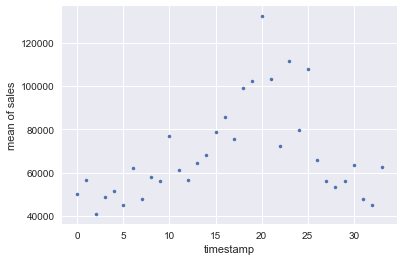

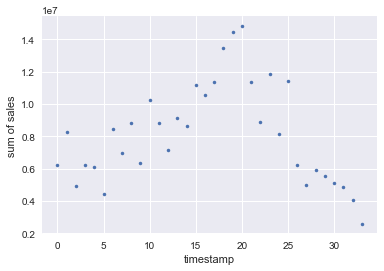

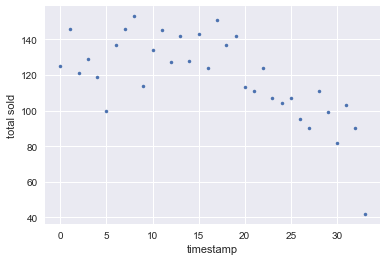

In [9]:
#t      = big_mean_date['Date']
t = big_mean_date.index.values

sales_mean = np.array(big_mean_date['Sales']['mean'])
sales_sum  = np.array(big_mean_date['Sales']['sum'])
n      = np.array(big_mean_date['Sales']['len'])

plt.figure()
plt.plot(t, sales_mean, '.')
plt.xlabel('timestamp')
plt.ylabel('mean of sales')

plt.figure()
plt.plot(t, sales_sum, '.')
plt.xlabel('timestamp')
plt.ylabel('sum of sales')

plt.figure()
plt.plot(t, n, '.')
plt.xlabel('timestamp')
plt.ylabel('total sold')

In [10]:
bigdata.head()

Sales  Net Sales  Billing qty       Qty      Cost  Net cost    Code  \
0  31716.59   31716.59        717.5       NaN  32526.66  32526.66    1420   
1  61830.00   61830.00      27480.0  274800.0  32976.00  32976.00  BL1290   
2  12029.25   12029.25       3040.0   91200.0  11156.80  11156.80  BL5094   
3   6106.40    6106.40       7633.0       NaN   6182.73   6182.73  CN3000   
4    -30.00     -30.00          NaN       NaN    -36.60    -36.60  CN5731   

         Date                             Name  
0  2014-04-01               Omega3(40/20)TGLiq  
1  2014-04-01  RH-ZV-SPlacenta15000-SG10-Blist  
2  2014-04-01  PHL-BG-StatusGuard-SG30-Blister  
3  2014-04-01  NDP-NUZ-WholeMilkPowder-P900-Ca  
4  2014-04-01  NZQ-GF-PMInfFormula3+DAN-P900-C

In [11]:
small_data = bigdata.groupby('Date')['Sales'].agg(['mean','std',len]).reset_index()

In [12]:
small_data.head()
# Interesting, this would give you the standard deviation of...
#...product sales across products, and how many unique products has been
#... sold. 


Date          mean            std    len
0  2014-04-01  50152.364597  110982.449545  125.0
1  2014-05-01  56757.698562  137533.760532  146.0
2  2014-06-01  40957.909000   94242.570872  121.0
3  2014-07-01  48570.627969  132298.398943  129.0
4  2014-08-01  51565.898814  115640.286937  119.0

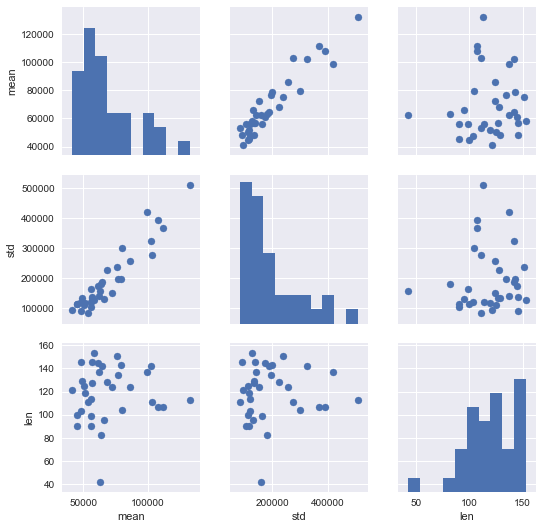

In [13]:
g = sns.PairGrid(small_data, vars=["mean", "std", "len"])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
# From this we can see that mean and std deviation is related to eachother.
# This means that the higher the avg. value of the products the more
# ...deviated
# The more products sold the month the higher the mean.

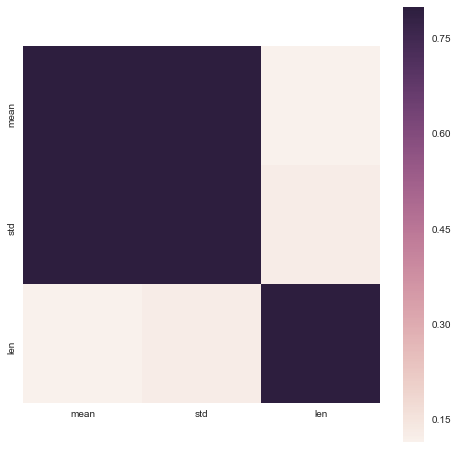

In [14]:
small_data = bigdata.groupby('Date')['Sales'].agg(['mean','std',len]).reset_index()
#small_data = small_data.T
small_data = small_data.reset_index("Date", drop=True)
small_data


corrmat = small_data.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

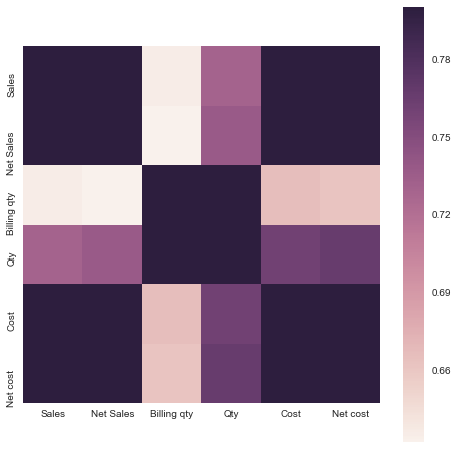

In [15]:
corrmat = bigdata.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Billing Quantity & QTY is closer related with costs than sales.

In [26]:
fire

0       -0.170091
1       -0.033425
2       -0.259440
3       -0.286320
4       -0.314169
5       -0.306454
6       -0.254627
7       -0.300581
8       -0.185977
9       -0.301394
10       0.111345
11      -0.057752
12       0.151473
13       0.024741
14      -0.296110
15      -0.263936
16      -0.268504
17      -0.245939
18      -0.228321
19      -0.279077
20      -0.259874
21      -0.254230
22       4.340332
23      -0.265754
24      -0.182098
25      -0.300146
26      -0.249518
27      -0.249456
28      -0.058381
29      -0.221427
30      -0.301542
31      -0.235374
32      -0.267152
33      -0.286601
34      -0.268597
35      -0.266440
36      -0.270669
37      -0.220971
38      -0.282229
39       0.144321
40      -0.137129
41      -0.273337
42      -0.289866
43      -0.152809
44      -0.248279
45      -0.242804
46      -0.298920
47      -0.169504
48      -0.121655
49      -0.309041
50      -0.219588
51      -0.254431
52       0.020219
53      -0.184436
54       0.051156
55       0

C:\Users\dsnow\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\dsnow\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


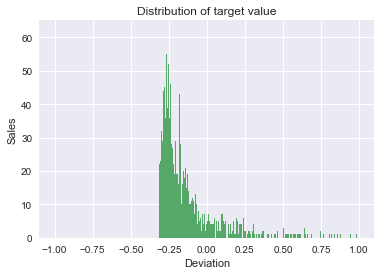

In [29]:
bigdata.dropna()
fire = (bigdata["Sales"] - bigdata["Sales"].mean())/(bigdata["Sales"].std())                                                  

y = fire.values
p = sns.color_palette()
plt.hist(y, bins=1000, range=[-1,1], color=p[1])
plt.xlabel('Deviation')
plt.ylabel('Sales')
plt.title('Distribution of target value')
#print('Target value min {0:.3f} max {1:.3f} mean {2:.3f} std {3:.3f}'.format(np.min(y), np.max(y), np.mean(y), np.std(y)))

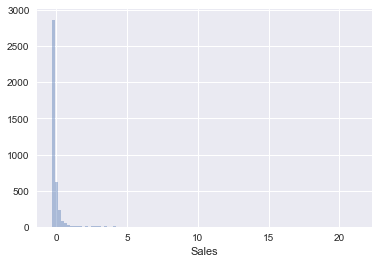

In [38]:
fire.dropna(inplace=True)
sns.distplot(fire, kde = False, bins = 100)
# Easier way to histogram.
It seems like my dataset has some very akward large data.

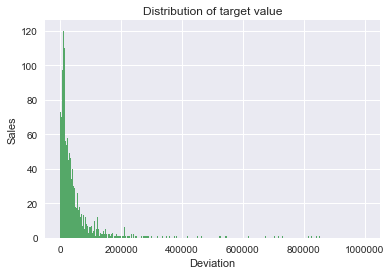

In [21]:
# Here I had to dropna(), is that legit, why is there NaN values?
# What you should do is make a list of what you are realising about the data some comments and some issues.

y = bigdata.dropna()['Sales'].values
p = sns.color_palette()
plt.hist(y, bins=1000, range=[0, 1000000], color=p[1])
plt.xlabel('Deviation')
plt.ylabel('Sales')
plt.title('Distribution of target value')
#print('Target value min {0:.3f} max {1:.3f} mean {2:.3f} std {3:.3f}'.format(np.min(y), np.max(y), np.mean(y), np.std(y)))

In [60]:
#result = bigdata.pivot(index="Name", columns='Name', values='Sales')

#index='animal',

In [61]:

new_data=big_mea.set_index(["Date","Name"], drop=True)
new_data = new_data.T
# Cool so you can transpose a multi-index. 
new_data.head()

Date                2014-04-01                                  \
Name        Omega3(40/20)TGLiq RH-ZV-SPlacenta15000-SG10-Blist   
Sales                  31716.6                           61830   
Net Sales              31716.6                           61830   
Billing qty              717.5                           27480   
Qty                        NaN                          274800   
Cost                   32526.7                           32976   

Date                                                                         \
Name        PHL-BG-StatusGuard-SG30-Blister NDP-NUZ-WholeMilkPowder-P900-Ca   
Sales                               12029.2                          6106.4   
Net Sales                           12029.2                          6106.4   
Billing qty                            3040                            7633   
Qty                                   91200                             NaN   
Cost                                11156.8                         6182.73   

Date                                                     \
Name        NZQ-GF-PMInfFormula3+DAN-P900-C Eligibility   
Sales                                   -30        1670   
Net Sales                               -30        1670   
Billing qty                             NaN         NaN   
Qty                                     NaN         NaN   
Cost                                  -36.6        1670   

Date                                                                   \
Name        TN-Propolis1000(NZ)-SG300 GN-DH-SuperColostrum-TB200-CP25   
Sales                         13089.6                            2964   
Net Sales                     13089.6                            2964   
Billing qty                      1616                             494   
Qty                            484800                           98800   
Cost                          9582.88                         1936.48   

Date                                                                     \
Name        TN-RoyalJelly1000(NZ)-SG180 GN-FR-ColostrumChew-TB200-CP350   
Sales                           28216.2                            2785   
Net Sales                       28216.2                            2785   
Billing qty                        2542                             557   
Qty                              457560                          111400   
Cost                            22750.9                          2116.6   

Date                                                              \
Name        EM-Omega1000-SG330 TBS-AUL-AntarcticKrillOil1000-S60   
Sales                  93728.8                           56469.6   
Net Sales              93728.8                           56469.6   
Billing qty              12822                              2852   
Qty                4.23126e+06                            171120   
Cost                   75521.6                           38644.6   

Date                                                                         \
Name        SA-NAO-OdourlessFO1500(NZ)-SG20 SA-NAO-OdourlessFO2000(NZ)-SG20   
Sales                                102571                         74646.4   
Net Sales                            102571                         74646.4   
Billing qty                           16464                           10101   
Qty                                  329280                          202020   
Cost                                 109980                         79898.9   

Date                                                           \
Name        GN-EVH-Propolis5000-SG120 WF-HL-Propolis5000-SG60   
Sales                          3949.3                 11038.5   
Net Sales                      3949.3                 11038.5   
Billing qty                       541                    2007   
Qty                             64920                  120420   
Cost                          2672.54                 5157.99   

Date                                        

Date           mean            std    len
0   2014-04-01   50152.364597  110982.449545  125.0
1   2014-05-01   56757.698562  137533.760532  146.0
2   2014-06-01   40957.909000   94242.570872  121.0
3   2014-07-01   48570.627969  132298.398943  129.0
4   2014-08-01   51565.898814  115640.286937  119.0
5   2014-09-01   44878.650101  112559.452485  100.0
6   2014-10-01   62296.447059  140145.408016  137.0
7   2014-11-01   47915.353103   90129.218141  146.0
8   2014-12-01   58139.089737  126827.762088  153.0
9   2015-01-01   55984.868584  119295.510300  114.0
10  2015-02-01   77013.891128  196468.123001  134.0
11  2015-03-01   61091.245278  172045.317070  145.0
12  2015-04-01   56638.731270  132922.582616  127.0
13  2015-05-01   64652.774965  187422.153727  142.0
14  2015-06-01   68066.065039  225524.780788  128.0
15  2015-07-01   78756.175563  197369.640912  143.0
16  2015-08-01   85670.002276  256010.103498  124.0
17  2015-09-01   75618.143600  237538.521255  151.0
18  2015-10-01   98922.564485  418787.015324  137.0
19  2015-11-01  102511.513191  324360.961618  142.0
20  2015-12-01  132240.621429  509107.572362  113.0
21  2016-01-01  103015.360273  275304.055260  111.0
22  2016-02-01   72391.423008  151471.718233  124.0
23  2016-03-01  111596.680283  367847.156838  107.0
24  2016-04-01   79477.538431  300535.361505  104.0
25  2016-05-01  107866.004906  391715.475505  107.0
26  2016-06-01   65889.599043  130293.433877   95.0
27  2016-07-01   56139.106067  104269.649694   90.0
28  2016-08-01   53458.016909   81530.173542  111.0
29  2016-09-01   56239.998571  162029.533665   99.0
30  2016-10-01   63334.319630  180100.648100   82.0
31  2016-11-01   47807.261176  119684.536089  103.0
32  2016-12-01   45271.599663  114248.163872   90.0
33  2017-01-01   62756.449756  156991.184028   42.0

In [52]:
bigdata.head()
bigdata[["Code","Name"]]

Code                                Name
0             1420                  Omega3(40/20)TGLiq
1           BL1290     RH-ZV-SPlacenta15000-SG10-Blist
2           BL5094     PHL-BG-StatusGuard-SG30-Blister
3           CN3000     NDP-NUZ-WholeMilkPowder-P900-Ca
4           CN5731     NZQ-GF-PMInfFormula3+DAN-P900-C
5               ED                         Eligibility
6           FP1017           TN-Propolis1000(NZ)-SG300
7           FP1275     GN-DH-SuperColostrum-TB200-CP25
8           FP1316         TN-RoyalJelly1000(NZ)-SG180
9           FP1426     GN-FR-ColostrumChew-TB200-CP350
10          FP1783                  EM-Omega1000-SG330
11          FP1911   TBS-AUL-AntarcticKrillOil1000-S60
12          FP2509     SA-NAO-OdourlessFO1500(NZ)-SG20
13          FP2903     SA-NAO-OdourlessFO2000(NZ)-SG20
14          FP2938           GN-EVH-Propolis5000-SG120
15          FP3178             WF-HL-Propolis5000-SG60
16          FP3187           WF-HL-Cranberry+VitC-HG60
17          FP3533     TBS-HK-Pro+Ganoderma-SG60-CP185
18          FP3618          TBS-HK-Cranberry+VitC-HG60
19          FP3870         WF-HL-VotaCelery-SG60-CP125
20          FP4061              SES-PL-Omega1000-SG100
21          FP4064     TBS-HK-SuperLiverPlus-SG60-CP18
22          FP4254        RI-Purtier(IV)-SG30-RIBottle
23          FP4419                 GN-DH-Squalene-SG60
24          FP4569     WF-HL-AntarcticFishOil-SG100-CP
25          FP4612           GN-BJ-GrapeMaxi-SG100-J21
26          FP4697         WF-HL-GrandaticGraSeed-SG60
27          FP4728                 TBS-HK-Omega3-SG365
28          FP5092      WF-HL-Pro+PineBark-SG200-CP700
29          FP5623         TBS-HK-Propolis10(500)-SG60
30          FP6045        GN-DH-Colostrum-TB200-P285WM
31          FP6166      TN-MarineCollagen400(NZ)-SG120
32          FP6257               WF-HL-BioOmega3-SG300
33          FP6765        TBS-HK-SeaweedCa-SG100-CP125
34          FP6872           TN-BeePollen500(NZ)-HG120
35          FP6941         GN-ND-Colostrum-TB200-FX280
36          FP7412      TBS-HK-ColostrumPro-TB250-P385
37          FP7918                  WF-HL-Omega3-SG365
38          FP7977       TBS-HK-SupremeSpirulina-TB200
39          FP8197                     EM-Omega3-SG360
40          FP8295           MIP-UHC-Omega3+CoQ10-SG60
41          FP8349        GN-DH-Propolis+Pinebark-SG60
42          FP8512              WF-HL-DeCal-SG60-CP125
43          FP8789     WF-HL-PropolisGrapeSeed-SG365-C
44          FP9202         WF-HL-MilkThistle56000-SG60
45          FP9524      WED-WM-ColostrumMilkChew-TB250
46          FP9840                   TBS-HK-DeCal-SG60
47          FP9953           DAL-Omega1000-SG200-CP500
48         FREIGHT                                   s
49      HEAVYMETAL                                   l
50          HG5817                    BM-KickStart-SZ0
51          OTHERS                              PLEASE
52          SE3608      OvinePlacenta300(50)EC-SB22-E0
53          SE6737     FIB-Omega1000(34/24)EC-SB20-E25
54          SE9193     FIB-ConcFO+TocotrienolEC-SB24E-
55          SG1071     PHL-KrillOil+CalamariOil-SB16-E
56          SG1360              Lecithin1200SS-SB24-E0
57          SG1823                 SA-VitA5000-SV05-E0
58          SG1919            Propolis+RBO(CP)-SV12-E1
59          SG1965     GSL-HalalFishOil1000(10/50)V-SB
60          SG2001       SA-OdourlessFO1500-SB24E-E1.8
61          SG2023      KrillOil+Glucosamine+2-SB24-E7
62          SG2164                     EPO1000-SB20-E1
63          SG2194     HalalAstaxanthin40+VitC-SV03-E0
64          SG2250         SA-OdourlessGarlic1-SV05-E0
65          SG2343                   Omega1000-SB20-E1
66          SG2477                Propolis1000-SV12-E0
67          SG2639             CoQ10+Ubiquinol-SB16-E0
68          SG2778               SA-Omega2000-SB30-E12
69          SG2999             SA-Lecithin1200-SB24-E0
70          SG3138     BirdNest+FlaxseedOil+Gold-SV12-
71          SG3142     BM-HalalFruityFishiesF2-SV16-E1